In [1]:
import os
import importlib
#from paths_creating_and_images_copying import * ## once you have previous script downloaded, no path are needed below
import numpy as np
from datetime import datetime
import json
import keras
from keras import layers
from keras import models
from keras import Model
from keras import optimizers
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import random
import cv2 as cv

Using TensorFlow backend.


In [2]:
## paths

model_dir = '/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel'

cyclone_dir = r'/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/cyclone'
earthquake_dir = r'/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/earthquake'
flood_dir = r'/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/flood'
wildfire_dir = r'/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/wildfire'

train_dir = os.path.join(model_dir, 'train')
validation_dir = os.path.join(model_dir, 'validation')
test_dir = os.path.join(model_dir, 'test')

train_dir_c = os.path.join(train_dir, 'cyclone')
train_dir_e = os.path.join(train_dir, 'earthquake')
train_dir_f = os.path.join(train_dir, 'flood')
train_dir_w = os.path.join(train_dir, 'wildfire')

validation_dir_c = os.path.join(validation_dir, 'cyclone')
validation_dir_e = os.path.join(validation_dir, 'earthquake')
validation_dir_f = os.path.join(validation_dir, 'flood')
validation_dir_w = os.path.join(validation_dir, 'wildfire')

test_dir_c = os.path.join(test_dir, 'cyclone')
test_dir_e = os.path.join(test_dir, 'earthquake')
test_dir_f = os.path.join(test_dir, 'flood')
test_dir_w = os.path.join(test_dir, 'wildfire')

print('Check if samples are of same size:\n\nTrain:')
print(len(os.listdir(train_dir_c)), len(os.listdir(train_dir_e)), len(os.listdir(train_dir_f)), len(os.listdir(train_dir_w)))
print('Validation:')
print(len(os.listdir(validation_dir_c)), len(os.listdir(validation_dir_e)), len(os.listdir(validation_dir_f)), len(os.listdir(validation_dir_w)))
print('Test:')
print(len(os.listdir(test_dir_c)), len(os.listdir(test_dir_e)), len(os.listdir(test_dir_f)), len(os.listdir(test_dir_w)))

Check if samples are of same size:

Train:
400 400 400 400
Validation:
100 100 100 100
Test:
100 100 100 100


**Create and train, or upload a model.** 

In [3]:
model = None

model_path = '/kaggle/input/disaster-images-dataset-cnn-model/best_model.h5'
model_history_path = '/kaggle/input/disaster-images-dataset-cnn-model/history'

model_exists = os.path.exists(model_path)
history_exists = os.path.exists(model_history_path)

if model_exists:
    model = load_model(model_path)

else:
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape= (180, 180, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.Dense(4, activation = 'softmax'))

#keras.backend.clear_session()
model.summary()

if not model_exists:
    model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['acc'])


train_datagen = ImageDataGenerator(rescale= 1./255,
                                    rotation_range= 40,
                                    width_shift_range= .2,
                                    height_shift_range= .2,
                                    shear_range= .2,
                                    zoom_range= .2,
                                    horizontal_flip= True)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size= (180, 180),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    target_size=(180, 180),
                                                    batch_size=32,
                                                    class_mode='categorical')

print('\n\nCheck a size of data/label batches:')
for data_batch, label_batch in train_generator:
    print('data batch size:', data_batch.shape)
    print('label batch size:', label_batch.shape)
    break

# logdir = "C:\\Users\\Mikołaj\\Desktop\\python\\MachineLearning\\KERAS\\DisasterModel\\Logs" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir = logdir, histogram_freq=0, write_graph=True, write_images=True)

es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=6)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)      

In case once model is created and its parameters are contained in the history file, we can restore them quickly. If it's empty, model will fit generators and save history file to use it later.

In [4]:
history = None

if history_exists:
    with open(model_history_path, 'r') as json_file:
        history = json.load(json_file)
else:
    history = model.fit_generator(train_generator,steps_per_epoch=150, epochs=100, validation_data=validation_generator, validation_steps=50, callbacks=[es, mc]) ##in callback one can put tensorboard_callback once lines 114 and 117 are run

    
## with open(model_history_path, 'w') as json_file:
##     json.dump(str(history.history), json_file)

Once the model is trained, we can evaluate and test it. In the below we take 400 images from the test directory, evaluate the model and list accuracy score and loss value, also there is a function which plots 9 images, named by model's predictions.

In [5]:
model_dir = '/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel'
test_dir = os.path.join(model_dir, 'test')

best_model = '/kaggle/input/disaster-images-dataset-cnn-model/best_model.h5'

label_names = {0: 'cyclone', 1: 'earthquake', 2: 'flood', 3: 'wildfire'}

model = load_model(best_model)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(180, 180), batch_size=1)

print(len(test_generator)) # [] batch_nr, [] data/labels, [] img_nr, [][] dims, [] channels

loss_test, acc_test = model.evaluate(test_generator)

print('\nThe accuracy of the model is:', str(np.round(acc_test, 2)),'% for loss value',str(np.round(loss_test, 2)),'%.')

Found 400 images belonging to 4 classes.
400
400/400 [==============================] - 15s 38ms/step

The accuracy of the model is: 0.84 % for loss value 0.06 %.


In [6]:
def run_prediction():
    n = 331
    plt.figure(figsize=(15, 15))
    for i in range(9):
        plt.subplot(n)
        idx = random.randint(0, len(test_generator)-1)
        predict = model.predict(test_generator[idx][0])
        plt.imshow(test_generator[idx][0][0])
        plt.title(label_names[np.argmax(predict)])
        n += 1

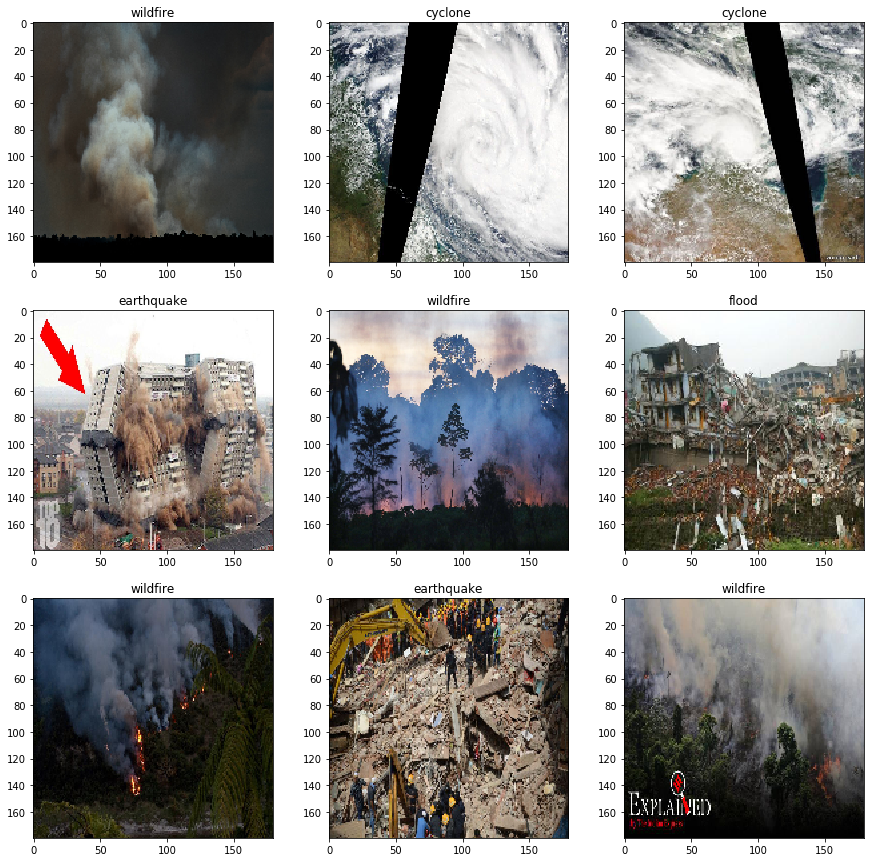

In [7]:
run_prediction()

Sometime it might be useful to have a look, what's going on inside our model. For convolutional neural networks we can take a look on particular layers (for example to see what patterns are recognized in each one). In the below, we take a random image, plot it with predicted name, then present what the model sees during 'recognition' on particular level.

In [8]:
best_model = '/kaggle/input/disaster-images-dataset-cnn-model/best_model.h5'
model = load_model(best_model)

sample_datagen = ImageDataGenerator(rescale = 1./255)
sample_dir = r'/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel'

sample_generator = sample_datagen.flow_from_directory(sample_dir, target_size=(180, 180), batch_size=1)

def run_visualisation():

    i = random.randint(0, len(sample_generator) - 1)

    plt.figure(figsize=(10, 10))
    predict = model.predict(sample_generator[i][0])
    title ='The below image should present the ' + str(label_names[np.argmax(predict)]) +'\n'
    plt.title(title, fontsize=20)
    plt.imshow(sample_generator[i][0][0])
    plt.show()


    layer_outputs = [layer.output for layer in model.layers]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(sample_generator[i][0])

    def display_activation(activations, col_size, row_size, act_index):
        activation = activations[act_index]
        activation_index=0
        fig, ax = plt.subplots(row_size, col_size, figsize=(15, 15))
        title1 = 'Images from the layer ' + str(act_index)
        fig.suptitle(title1, fontsize=16)
        for row in range(0, row_size):
            for col in range(0, col_size):
                ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
                activation_index += 1

    display_activation(activations, 2, 2, 0) ## 4 images from the 1st layer
    plt.show()

    display_activation(activations, 2, 2, 1) ## 4 images from the 2nd layer
    plt.show()

    display_activation(activations, 2, 2, 3) ## 4 images from the 4th layer
    plt.show()

    display_activation(activations, 3, 3, 5) ## 9 images from the 6th layer
    plt.show()

Found 6828 images belonging to 4 classes.


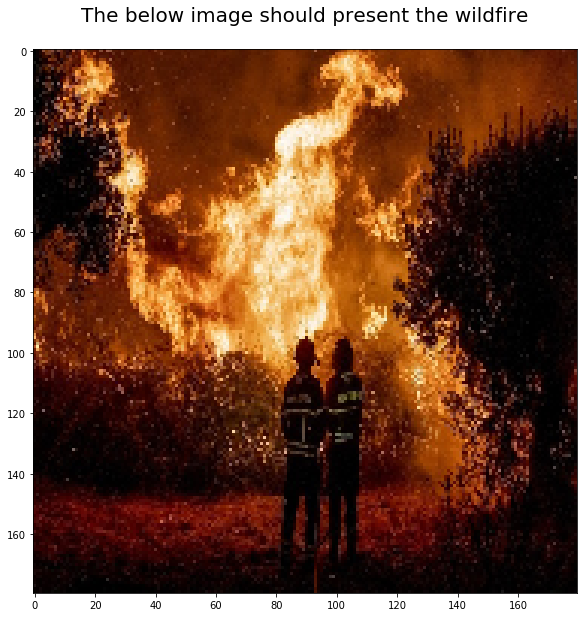

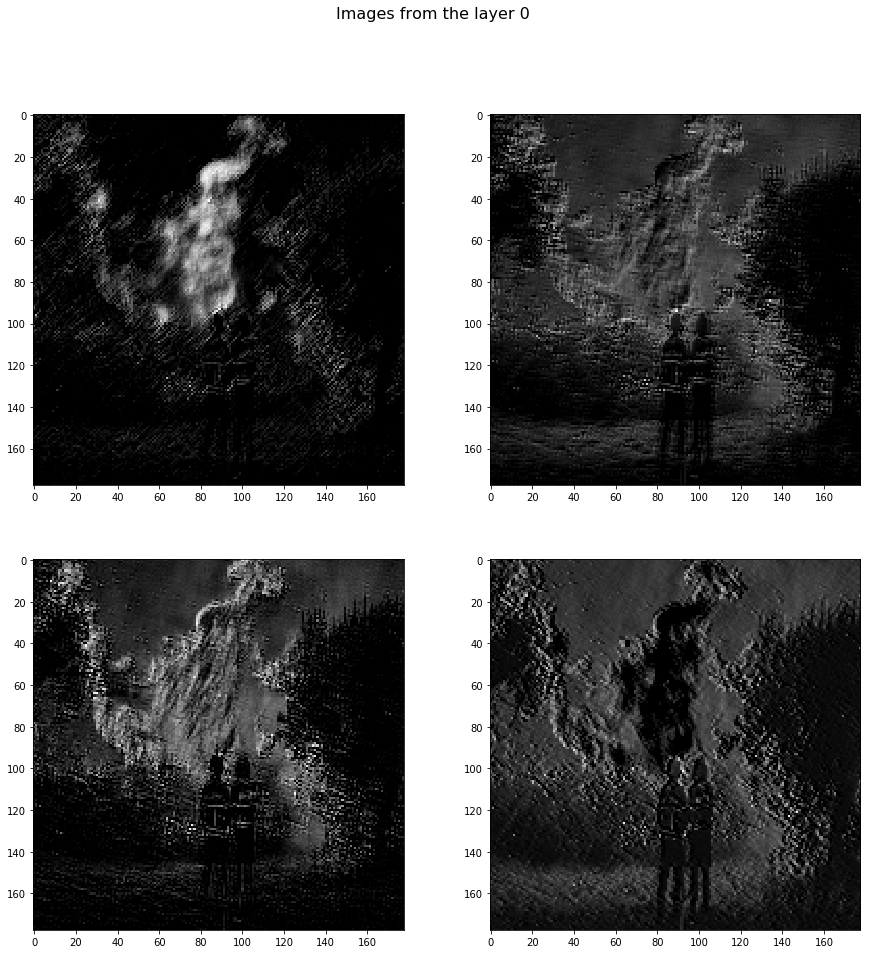

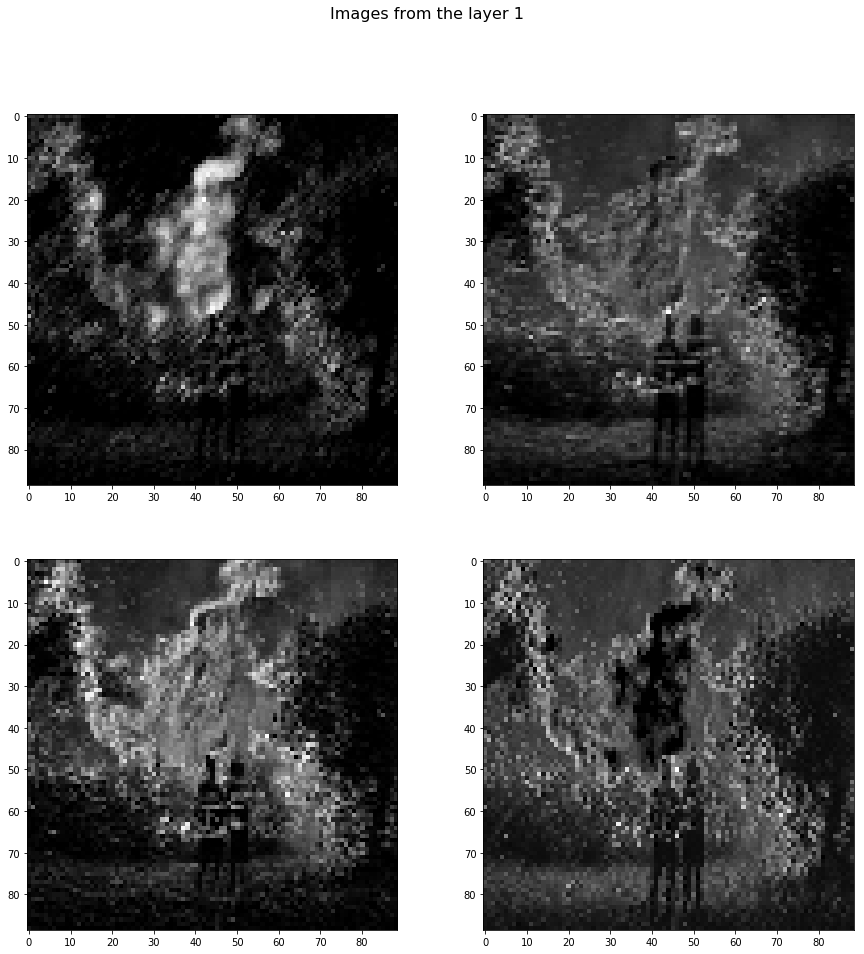

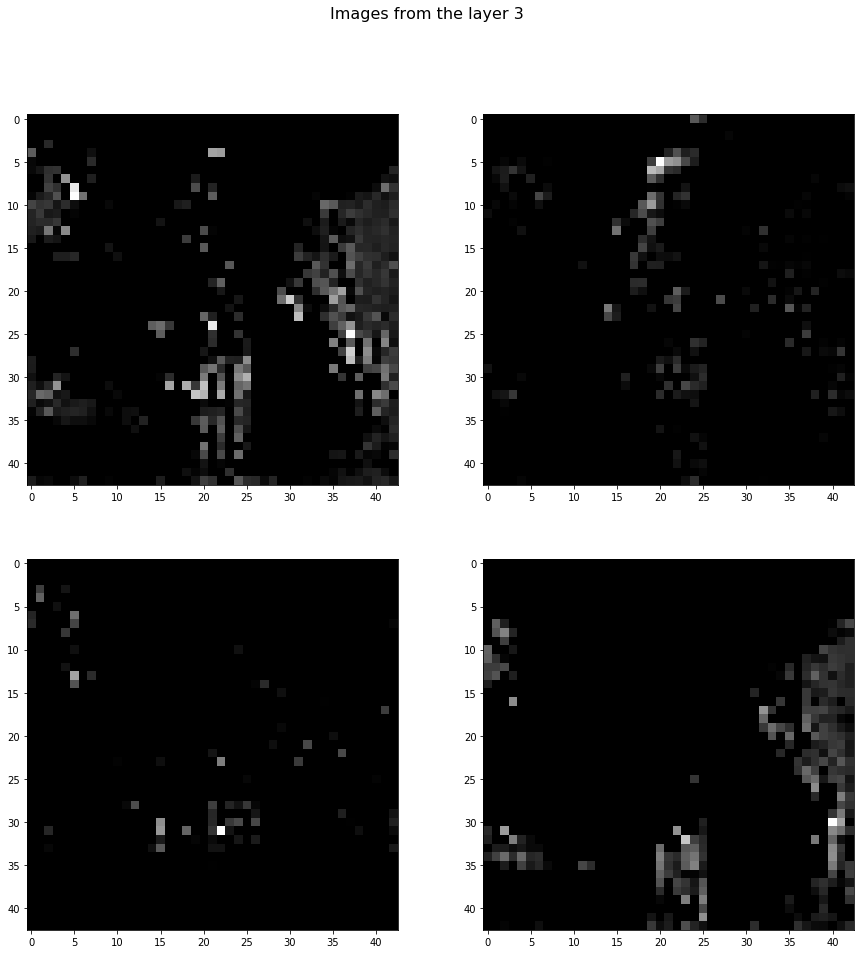

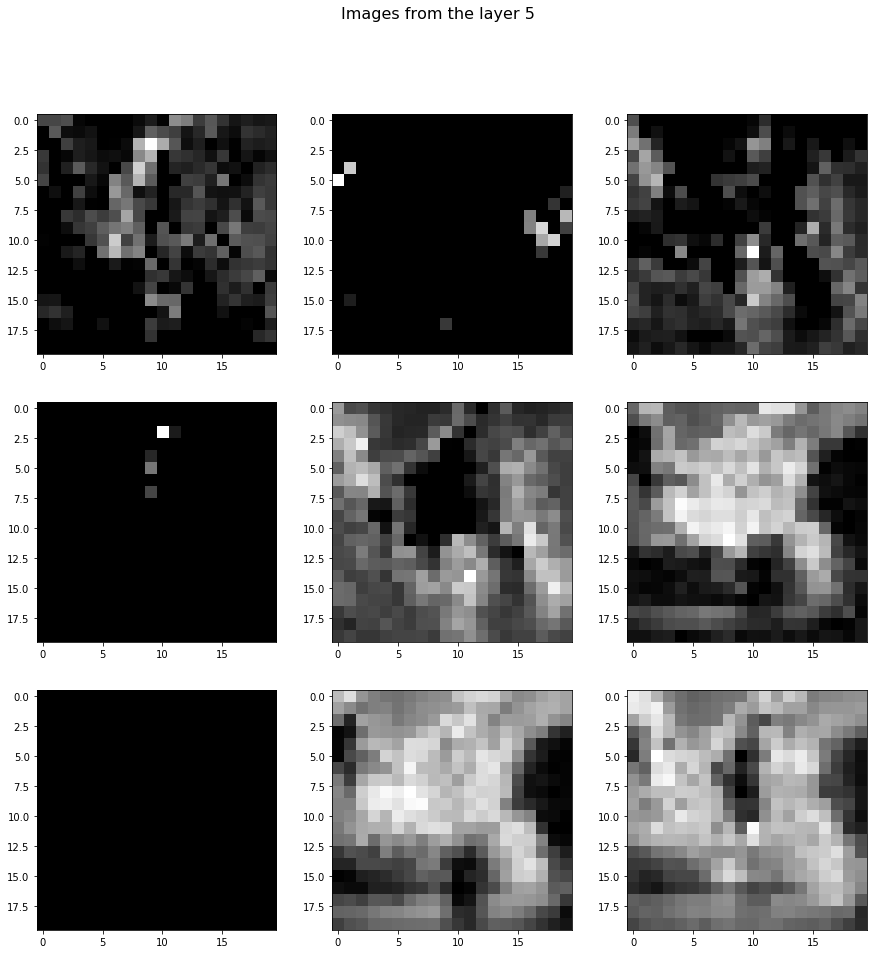

In [9]:
run_visualisation()